In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('churn_data.csv')

In [3]:
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,8/17/2017,No,xxxxxxxx,...,300.63,53005.25,17,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,8/28/2017,?,CID21329,...,306.34,12838.38,10,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,11/11/2016,Yes,CID12313,...,516.16,21027.00,22,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,10/29/2016,Yes,CID3793,...,53.27,25239.56,6,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,9/12/2017,No,xxxxxxxx,...,113.13,24483.66,16,663.06,No,Yes,Yes,Solved,Poor Website,5


In [4]:
df.shape

(36992, 25)

In [5]:
df.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.shape

(28373, 25)

In [8]:
df.duplicated().sum()

0

In [9]:
df.nunique()

customer_id                     28373
Name                            28373
age                                55
gender                              3
security_no                     28373
region_category                     3
membership_category                 6
joining_date                     1096
joined_through_referral             3
referral_id                      9604
preferred_offer_types               3
medium_of_operation                 4
internet_option                     3
last_visit_time                 24196
days_since_last_login              27
avg_time_spent                  21049
avg_transaction_value           28312
avg_frequency_login_days         1266
points_in_wallet                20977
used_special_discount               2
offer_application_preference        2
past_complaint                      2
complaint_status                    5
feedback                            9
churn_risk_score                    6
dtype: int64

In [10]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,28373.000000,28373.000000,28373.000000,28373.000000,28373.000000,28373.000000
mean,37.081310,-42.587319,243.610043,29314.556610,688.008287,3.458253
std,15.894149,230.134583,401.153815,19509.169615,194.227585,1.411966
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,59.840000,14191.820000,616.620000,3.000000
50%,37.000000,12.000000,161.670000,27562.670000,698.480000,4.000000
75%,51.000000,16.000000,356.580000,40901.120000,764.960000,5.000000
max,64.000000,26.000000,3040.410000,99914.050000,2069.069761,5.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28373 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   28373 non-null  object 
 1   Name                          28373 non-null  object 
 2   age                           28373 non-null  int64  
 3   gender                        28373 non-null  object 
 4   security_no                   28373 non-null  object 
 5   region_category               28373 non-null  object 
 6   membership_category           28373 non-null  object 
 7   joining_date                  28373 non-null  object 
 8   joined_through_referral       28373 non-null  object 
 9   referral_id                   28373 non-null  object 
 10  preferred_offer_types         28373 non-null  object 
 11  medium_of_operation           28373 non-null  object 
 12  internet_option               28373 non-null  object 
 13  last_v

In [12]:
df = df.drop(columns=['customer_id', 'Name', 'security_no', 'referral_id'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28373 entries, 0 to 36991
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           28373 non-null  int64  
 1   gender                        28373 non-null  object 
 2   region_category               28373 non-null  object 
 3   membership_category           28373 non-null  object 
 4   joining_date                  28373 non-null  object 
 5   joined_through_referral       28373 non-null  object 
 6   preferred_offer_types         28373 non-null  object 
 7   medium_of_operation           28373 non-null  object 
 8   internet_option               28373 non-null  object 
 9   last_visit_time               28373 non-null  object 
 10  days_since_last_login         28373 non-null  int64  
 11  avg_time_spent                28373 non-null  float64
 12  avg_transaction_value         28373 non-null  float64
 13  avg_fr

In [14]:
df.head()

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,Village,Platinum Membership,8/17/2017,No,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,...,300.63,53005.25,17,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
2,44,F,Town,No Membership,11/11/2016,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,...,516.16,21027.00,22,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,37,M,City,No Membership,10/29/2016,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,...,53.27,25239.56,6,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,31,F,City,No Membership,9/12/2017,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,...,113.13,24483.66,16,663.06,No,Yes,Yes,Solved,Poor Website,5
5,13,M,City,Gold Membership,1/8/2016,No,Gift Vouchers/Coupons,?,Wi-Fi,6:46:07,...,433.62,13884.77,24,722.27,Yes,No,Yes,Unsolved,No reason specified,3


In [15]:
df['churn_risk_score'].value_counts()

churn_risk_score
 3    7998
 4    7814
 5    7499
 2    2116
 1    2045
-1     901
Name: count, dtype: int64

In [16]:
np.sort(df['age'].unique())

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64], dtype=int64)

<Axes: >

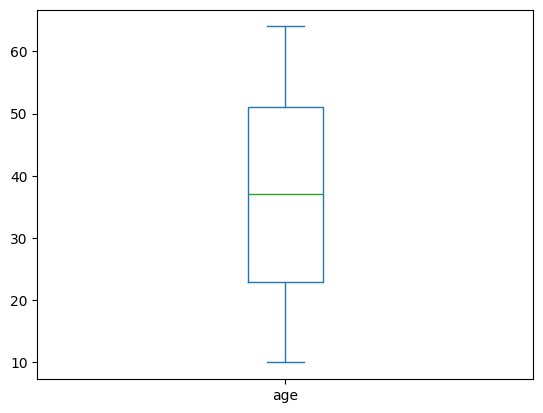

In [17]:
df['age'].plot(kind='box')

In [18]:
df['gender'].value_counts()

gender
F          14203
M          14127
Unknown       43
Name: count, dtype: int64

In [19]:
df = df[df['gender'] != 'Unknown']

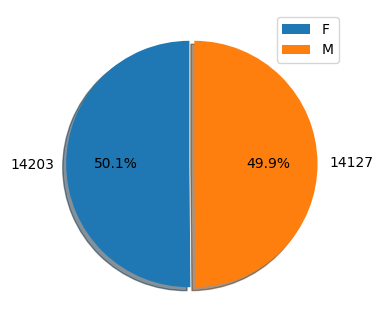

In [20]:
genders = df['gender'].value_counts()

plt.figure(figsize=(4,4))
plt.pie(genders, 
        labels = genders.values,         
        explode = [0.02,0.02],
        autopct ='%1.1f%%',
        shadow = True,
        startangle = 90
        )
plt.legend(genders.index)
plt.show()


In [21]:
df['region_category'].value_counts()

region_category
Town       12679
City       11389
Village     4262
Name: count, dtype: int64

<Axes: xlabel='region_category'>

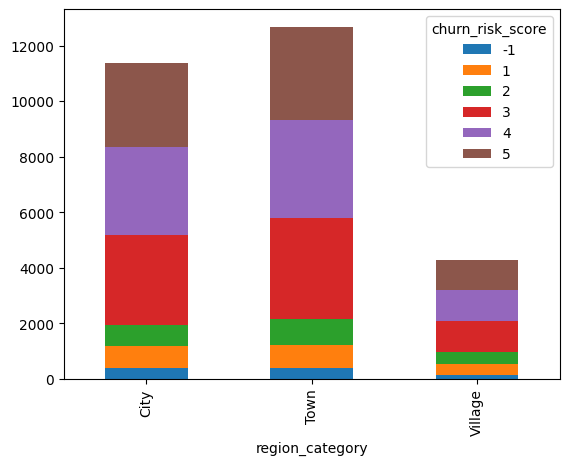

In [22]:
pd.crosstab(df['region_category'], df['churn_risk_score']).plot(kind='bar', stacked=True)

In [23]:
df['membership_category'].value_counts()

membership_category
Basic Membership       5886
No Membership          5872
Gold Membership        5201
Silver Membership      4621
Premium Membership     3420
Platinum Membership    3330
Name: count, dtype: int64

<Axes: xlabel='membership_category'>

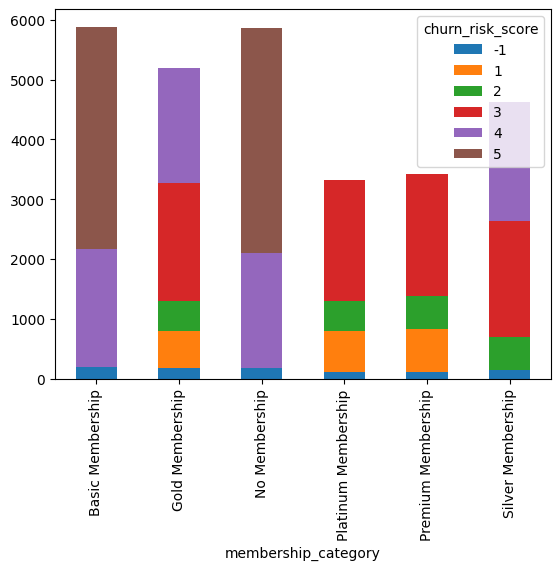

In [24]:
pd.crosstab(df['membership_category'], df['churn_risk_score']).plot(kind='bar', stacked=True)

In [25]:
df['joining_date']

0         8/17/2017
2        11/11/2016
3        10/29/2016
4         9/12/2017
5          1/8/2016
            ...    
36985    10/25/2016
36986      9/7/2015
36988     6/27/2016
36990     6/15/2017
36991    10/23/2015
Name: joining_date, Length: 28330, dtype: object

In [26]:
df['joining_date'] = pd.to_datetime(df['joining_date'])

In [27]:
df['joining_date'].apply(lambda x:str(x).split()[0].split('-')[0]).value_counts()

joining_date
2017    9628
2015    9446
2016    9256
Name: count, dtype: int64

In [28]:
df['joined_through_referral'].value_counts()

joined_through_referral
No     12164
Yes    12002
?       4164
Name: count, dtype: int64

In [29]:
df = df[df['joined_through_referral'] != '?']

In [30]:
df['joined_through_referral'].value_counts()

joined_through_referral
No     12164
Yes    12002
Name: count, dtype: int64

In [31]:
df['preferred_offer_types'].value_counts()

preferred_offer_types
Credit/Debit Card Offers    8102
Gift Vouchers/Coupons       8100
Without Offers              7964
Name: count, dtype: int64

<Axes: xlabel='preferred_offer_types'>

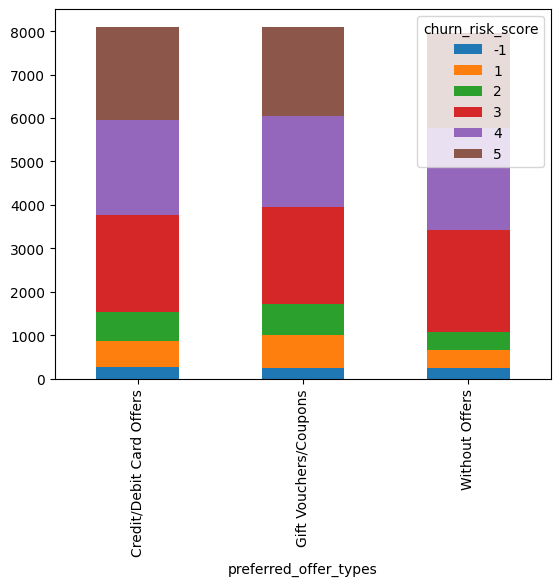

In [32]:
pd.crosstab(df['preferred_offer_types'], df['churn_risk_score']).plot(kind='bar', stacked=True)

In [33]:
df['medium_of_operation'].value_counts()

medium_of_operation
Smartphone    9108
Desktop       9075
?             3472
Both          2511
Name: count, dtype: int64

In [34]:
df = df[df['medium_of_operation'] != '?']

In [35]:
df['medium_of_operation'].value_counts()

medium_of_operation
Smartphone    9108
Desktop       9075
Both          2511
Name: count, dtype: int64

<Axes: xlabel='medium_of_operation'>

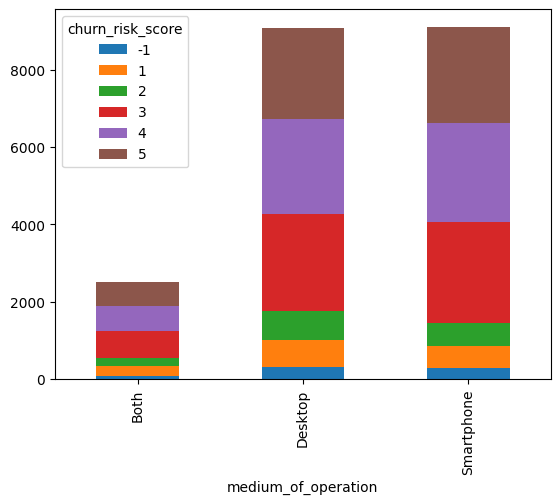

In [36]:
pd.crosstab(df['medium_of_operation'], df['churn_risk_score']).plot(kind='bar', stacked=True)

In [37]:
df['internet_option'].value_counts()

internet_option
Mobile_Data    6938
Fiber_Optic    6882
Wi-Fi          6874
Name: count, dtype: int64

In [38]:
df['last_visit_time']

2        22:53:21
3        15:57:50
4        15:46:44
6        11:40:04
10        5:57:20
           ...   
36985     3:30:17
36986     5:29:19
36988    23:18:31
36990     9:50:03
36991     1:39:52
Name: last_visit_time, Length: 20694, dtype: object

In [39]:
df = df.drop(columns=['last_visit_time'])

In [40]:
df['days_since_last_login'].unique()

array([  14,   11,   20,   10,   13,    9,   15,   21,   12,   17,   18,
         22,    8,    6,   16, -999,    4,   19,    5,    1,   24,    3,
          7,    2,   26,   25,   23], dtype=int64)

In [41]:
df = df[df['days_since_last_login'] != -999]

In [42]:
df['days_since_last_login'].unique()

array([14, 11, 20, 10, 13,  9, 15, 21, 12, 17, 18, 22,  8,  6, 16,  4, 19,
        5,  1, 24,  3,  7,  2, 26, 25, 23], dtype=int64)

In [43]:
df['avg_time_spent'].describe()

count    19550.000000
mean       243.262278
std        403.601309
min      -2814.109110
25%         59.640000
50%        160.680000
75%        354.177500
max       3040.410000
Name: avg_time_spent, dtype: float64

In [44]:
df = df[df['avg_time_spent'] > 0]

In [45]:
df['avg_transaction_value'].describe()

count    18628.000000
mean     29374.232869
std      19573.167368
min        800.460000
25%      14279.512500
50%      27628.775000
75%      40859.962500
max      99914.050000
Name: avg_transaction_value, dtype: float64

In [46]:
df['avg_frequency_login_days']

2           22
3            6
4           16
6           28
10           8
         ...  
36984        2
36985        7
36986       16
36990       20
36991    Error
Name: avg_frequency_login_days, Length: 18628, dtype: object

In [47]:
df['avg_frequency_login_days'] = (pd.to_numeric(df["avg_frequency_login_days"],errors="coerce"))

In [48]:
df[df['avg_frequency_login_days'].isna() == True]['avg_frequency_login_days'].unique()

array([nan])

In [49]:
df = df[df['avg_frequency_login_days'].isna() == False]

In [50]:
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].apply(lambda x:int(x))

In [51]:
df = df[df['avg_frequency_login_days'] > 0]

In [52]:
df['points_in_wallet'].describe()

count    16521.000000
mean       688.254699
std        192.896337
min       -760.661236
25%        617.280000
50%        698.930000
75%        764.910000
max       2069.069761
Name: points_in_wallet, dtype: float64

In [53]:
df['used_special_discount'].value_counts()

used_special_discount
Yes    9084
No     7437
Name: count, dtype: int64

In [54]:
df['offer_application_preference'].value_counts()

offer_application_preference
Yes    9114
No     7407
Name: count, dtype: int64

<Axes: xlabel='used_special_discount'>

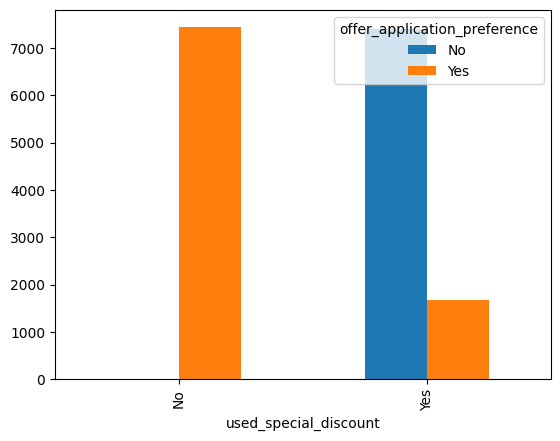

In [55]:
pd.crosstab(df['used_special_discount'], df['offer_application_preference']).plot(kind='bar')

In [56]:
df['past_complaint'].value_counts()

past_complaint
No     8266
Yes    8255
Name: count, dtype: int64

In [57]:
df['complaint_status'].value_counts()

complaint_status
Not Applicable              8266
Solved                      2098
Unsolved                    2090
Solved in Follow-up         2055
No Information Available    2012
Name: count, dtype: int64

In [58]:
df['feedback'].value_counts()

feedback
Poor Website                2817
Poor Product Quality        2809
Too many ads                2806
Poor Customer Service       2804
No reason specified         2769
Reasonable Price             646
User Friendly Website        642
Quality Customer Care        618
Products always in Stock     610
Name: count, dtype: int64

In [59]:
df = df.reset_index(drop=True)

In [60]:
df['ID'] = df.index + 1

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16521 entries, 0 to 16520
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   age                           16521 non-null  int64         
 1   gender                        16521 non-null  object        
 2   region_category               16521 non-null  object        
 3   membership_category           16521 non-null  object        
 4   joining_date                  16521 non-null  datetime64[ns]
 5   joined_through_referral       16521 non-null  object        
 6   preferred_offer_types         16521 non-null  object        
 7   medium_of_operation           16521 non-null  object        
 8   internet_option               16521 non-null  object        
 9   days_since_last_login         16521 non-null  int64         
 10  avg_time_spent                16521 non-null  float64       
 11  avg_transaction_value       

In [62]:
df.head()

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,...,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,ID
0,44,F,Town,No Membership,2016-11-11,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14,...,21027.00,22,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5,1
1,37,M,City,No Membership,2016-10-29,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11,...,25239.56,6,567.66,No,Yes,Yes,Unsolved,Poor Website,5,2
2,31,F,City,No Membership,2017-09-12,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20,...,24483.66,16,663.06,No,Yes,Yes,Solved,Poor Website,5,3
3,21,M,Town,Gold Membership,2015-03-19,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,10,...,8982.50,28,756.21,Yes,No,Yes,Solved in Follow-up,No reason specified,3,4
4,25,F,Village,Basic Membership,2016-05-22,Yes,Gift Vouchers/Coupons,Both,Wi-Fi,14,...,35119.93,8,699.70,Yes,Yes,No,Not Applicable,Poor Product Quality,5,5


In [63]:
pd.DataFrame(df).to_csv(r'Churn_2_Cleaned.csv')